# Example 13: Phase transition

In this example, we will use KAN to learn phase transitions in data. Phase transition is an important concept in science. We consider a toy example $f(x_1,x_2,x_3)$ is 1 if $g(x_1,x_2,x_3)>0$, and is 0 if $g(x_1,x_2,x_3)<0$. $g(x_1,x_2,x_3)={\rm sin}(\pi x_1)+{\rm cos}(\pi x_2)+{\rm tan}(\frac{\pi}{2}x_3)$.

Intialize model and create dataset

In [1]:
from kan import KAN, create_dataset
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = KAN(width=[3,1,1], grid=3, k=3, device=device)

# create dataset
f = lambda x: (torch.sin(torch.pi*x[:,[0]]) + torch.cos(torch.pi*x[:,[1]]) + torch.tan(torch.pi/2*x[:,[2]]) > 0).float()
dataset = create_dataset(f, n_var=3, device=device)


cuda
checkpoint directory created: ./model
saving model version 0.0


In [2]:
torch.mean(dataset['train_label'])

tensor(0.5060, device='cuda:0')

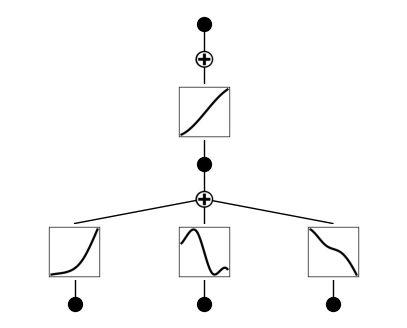

In [3]:
model(dataset['train_input'])
model.plot(beta=10)

In [4]:
# set the last activation to be tanh
model.fix_symbolic(1,0,0,'tanh',fit_params_bool=False)

saving model version 0.1


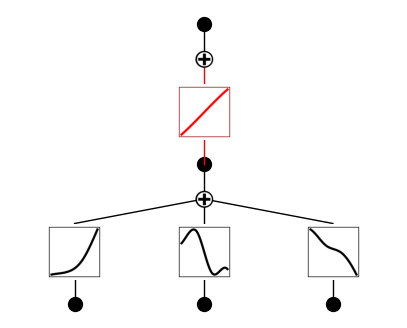

In [5]:
model(dataset['train_input'])
model.plot(beta=10)

In [6]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 7.71e-02 | test_loss: 1.17e-01 | reg: 2.43e+02 | : 100%|█| 50/50 [00:09<00:00,  5.32it


saving model version 0.2


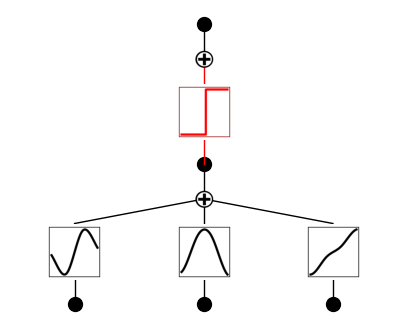

In [7]:
model.plot(beta=10)